# MLPRegressor with Synthetic DataSet

## About DataSet

I had made it with Excel

There are 10000 rows

### Columns:
- s1 — number first
- s2 — number second
- sum — first + second

### Modules

In [114]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt
%matplotlib inline

### Load and separate data

In [115]:
data = pd.read_csv('syn_data.csv', sep=';')
data.head()

,s1,s2,sum
0,59,63,122
1,30,9,39
2,78,21,99
3,24,66,90
4,66,82,148


In [116]:
X = data.iloc[:, :2]
Y = data.iloc[:, 2]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

print('Shape of X_train:\t{}'.format(X_train.shape))
print('Shape of X_test:\t{}'.format(X_test.shape))
print('Shape of y_train:\t{}'.format(y_train.shape))
print('Shape of y_test:\t{}'.format(y_test.shape))

Shape of X_train:	(7499, 2)
Shape of X_test:	(2500, 2)
Shape of y_train:	(7499,)
Shape of y_test:	(2500,)


### Test simple model

In [131]:
MLPR_nude = MLPRegressor(hidden_layer_sizes=(5,), max_iter=500, random_state=0)
MLPR_nude.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [136]:
print('Train R2:\t{:.7f}'.format(MLPR_nude.score(X_train, y_train)))
print('Test R2:\t{:.7f}'.format(MLPR_nude.score(X_test, y_test)))

Train R2:	0.9999992
Test R2:	0.9999993


In [135]:
print('2 + 2 = {:.3f}'.format(MLPR_nude.predict([[2,2]])[0]))

2 + 2 = 4.078


### Loop to check ABS's between real value and predictions 

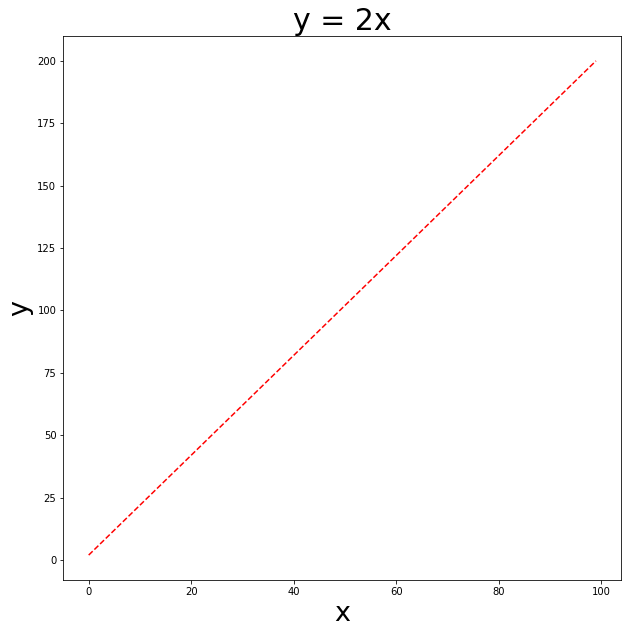

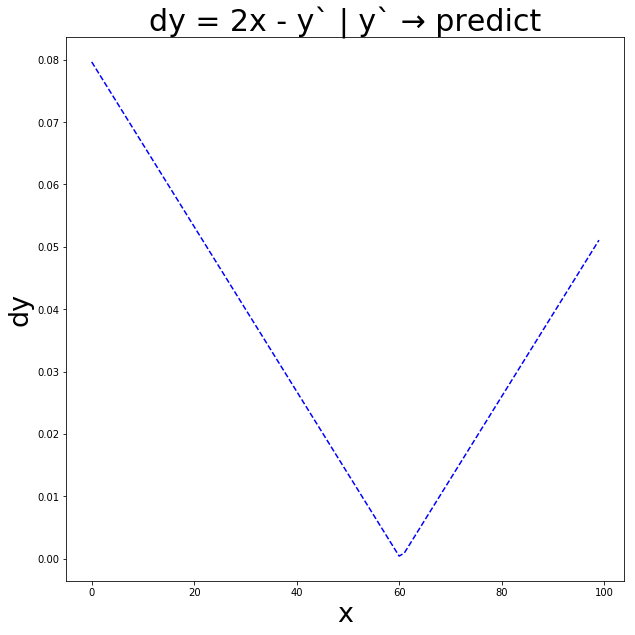

In [122]:
MLPR_loop = MLPRegressor(hidden_layer_sizes=(5,), max_iter=500, random_state=0)
MLPR_loop.fit(X_train, y_train)

main_line = []
nn_line = []

for i in range(1, 101):
    a = 2 * i
    main_line.append(a)
    
    nn_score = MLPR_loop.predict([[i,i]])
    abs_score = abs(nn_score - a)
    nn_line.append(abs_score)


plt.figure(figsize=(10,10))
plt.title('y = 2x', fontsize=30)
plt.ylabel('y', fontsize=27)
plt.xlabel('x', fontsize=27)
plt.plot(main_line, 'r--')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(nn_line, 'b--')
plt.title('dy = 2x - y` | y` → predict', fontsize=30)
plt.ylabel('dy', fontsize=27)
plt.xlabel('x', fontsize=27)
plt.show()

# PS:
## I have a NNCalculator with MLPRegressor in another repo
### [LINK](https://github.com/andybeardness/4Orn_Neural_Network_Calculator)

![giphy](giphy.gif)